# Bio-economic modelling

In [7]:
import handcalcs.render
import math as math
from sympy import * #symbolic algebra package
import numpy as np #numerical python packagee
import matplotlib.pyplot as plt #matplotlib is a plotting package
%matplotlib inline  
# without this plots are popouts

## Add fishing

Use the following catch equation to modify the computer code above to incorporate fishing into our model:

$Y = q X E$

where$$Y$$is catch, $$q$$ is the catchability and $$X$$ is the stock and $$E$$ fishing effort.

Produce a graph and vary fishing effort to see how the graph changes. Assume fishing effort is some cosntant.


The following is a discrete time model of stock dynamics with constant effort.

In [8]:
# Constants 
r = 1 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
q = 0.01 #catchability
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
E = np.zeros(10)

x[0] = x0 # pass initial value to vector

for i in range(0,len(x)-1):
     E[i] = 0.0000
     x[i+1] = x[i] + r*x[i]*(1-x[i]/K) # - q*x[i]*E[i]
print(i,x) 


8 [ 1.          1.99        3.940399    7.72553056 14.85422289 27.5019664
 47.44035125 72.37483323 92.36850161 99.41760232]


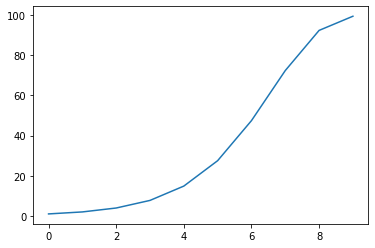

In [10]:
plt.plot(x)